In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus
import scipy
from pandarallel import pandarallel


p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [4]:
h5_annot = 'cerberus_annot_triplets.h5'

In [5]:
ca = cerberus.read(h5_annot)

In [10]:
def do_go_thing(df, opref):
    dbs = ['GO_Biological_Process_2021',
       'GO_Cellular_Component_2021',
       'GO_Molecular_Function_2021',
       'KEGG_2021_Human']
    bm = gp.parser.Biomart()
    datasets = bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')
    datasets.loc[datasets.Description.str.contains('Human')]
    
    for s in df.sector.unique():
        print(s)
        desc = '{} genes'.format(s)
        odir = '{}{}_genes_GO'.format(opref, s)
        gids = df.loc[df.sector == s, 'gid'].tolist()
        gids = bm.query(dataset='hsapiens_gene_ensembl',
               attributes=['ensembl_gene_id', 'external_gene_name'],
               filters={'ensembl_gene_id': gids})
        gids = gids.loc[~gids.external_gene_name.isna()]
        gnames = gids.external_gene_name.squeeze().str.strip().tolist()
        go = gp.enrichr(gene_list=gnames,
                        gene_sets=dbs,
                        organism='Human',
                        description=desc,
                        outdir=odir,
                        cutoff=0.5)

## GO analyses for genes that lie in each sector of the simplex

In [5]:
source = 'obs_det'
df = ca.triplets.loc[ca.triplets.source == source
df = assign_gisx_sector(df)

# limit to protein coding genes
gtf_df, _, _ = get_gtf_info(how='gene', ver='v40_cerberus')
gtf_df['gid_stable'] = cerberus.get_stable_gid(gtf_df, col='gid')
gids = gtf_df.loc[gtf_df.biotype_category=='protein_coding', 'gid_stable'].tolist()
print(len(df.index))
df = df.loc[df.gid.isin(gids)]
print(len(df.index))

In [ ]:
do_go_thing(df, '')

## GO analyses for genes that lie in each sector of the simplex for major isos

In [7]:
source = 'obs_major'
df = ca.triplets.loc[ca.triplets.source == source]
df = assign_gisx_sector(df)

# limit to protein coding genes
gtf_df, _, _ = get_gtf_info(how='gene', ver='v40_cerberus')
gtf_df['gid_stable'] = cerberus.get_stable_gid(gtf_df, col='gid')
gids = gtf_df.loc[gtf_df.biotype_category=='protein_coding', 'gid_stable'].tolist()
print(len(df.index))
df = df.loc[df.gid.isin(gids)]
print(len(df.index))

26781
17523


In [11]:
do_go_thing(df, 'obs_major_')

tes


2022-10-13 13:12:06,219 Error fetching enrichment results: GO_Biological_Process_2021
2022-10-13 13:12:15,567 Error fetching enrichment results: GO_Cellular_Component_2021
2022-10-13 13:12:24,292 Error fetching enrichment results: GO_Molecular_Function_2021
2022-10-13 13:12:33,161 Error fetching enrichment results: KEGG_2021_Human


simple


2022-10-13 13:12:48,980 Error fetching enrichment results: GO_Biological_Process_2021
2022-10-13 13:12:54,477 Error fetching enrichment results: GO_Cellular_Component_2021
2022-10-13 13:12:59,593 Error fetching enrichment results: GO_Molecular_Function_2021
2022-10-13 13:13:04,930 Error fetching enrichment results: KEGG_2021_Human


mixed


2022-10-13 13:14:20,212 Error fetching enrichment results: GO_Biological_Process_2021
2022-10-13 13:14:37,126 Error fetching enrichment results: GO_Cellular_Component_2021
2022-10-13 13:14:52,876 Error fetching enrichment results: GO_Molecular_Function_2021
2022-10-13 13:15:08,296 Error fetching enrichment results: KEGG_2021_Human


splicing


2022-10-13 13:15:28,010 Error fetching enrichment results: GO_Biological_Process_2021
2022-10-13 13:15:35,949 Error fetching enrichment results: GO_Cellular_Component_2021
2022-10-13 13:15:39,540 Error fetching enrichment results: GO_Molecular_Function_2021
2022-10-13 13:15:43,331 Error fetching enrichment results: KEGG_2021_Human
2022-10-13 13:15:43,650 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.5


tss


2022-10-13 13:16:16,754 Error fetching enrichment results: GO_Biological_Process_2021
2022-10-13 13:17:23,071 Error fetching enrichment results: GO_Cellular_Component_2021
2022-10-13 13:17:29,125 Error fetching enrichment results: GO_Molecular_Function_2021
2022-10-13 13:17:34,652 Error fetching enrichment results: KEGG_2021_Human


## Make bar plots on my own

In [50]:
def rm_go_number(df):
    df['term'] = df['Term'].str.split('\(GO', expand=True)[0]
    return df

# def add_newline(df):
#     n = 45
#     terms = []
#     for ind, entry in df.iterrows():
#         string = entry.term
#         print(string)
#         new_string = ''
#         i = 0
#         while (i+1)*n < len(string):
#             new_string += string[i*n:((i+1)*n)]+'\n'
#             print(i)
#             print(new_string)
#             i += 1
#         new_string += string[i*n:]
#         print(i)
#         print(new_string)
#         terms.append(new_string)
#         print()
#     df['term'] = terms
#     return df
    

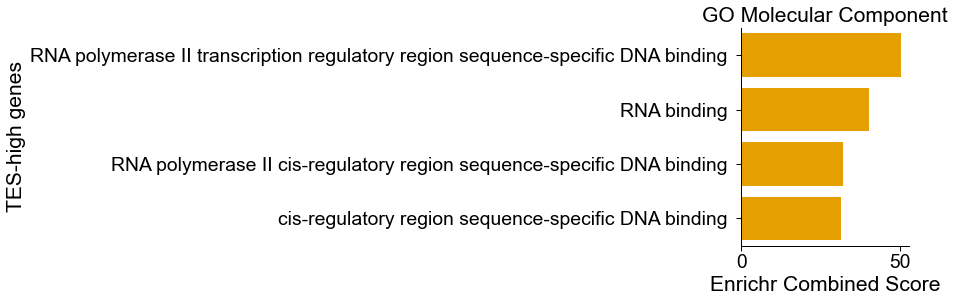

In [73]:
# tes - show molecular function
df = pd.read_csv('obs_major_tes_genes_GO/GO_Molecular_Function_2021.Human.enrichr.reports.txt', sep='\t')
n = 4
kind = 'tes'
df = df.head(n)
df = rm_go_number(df)
color = get_sector_colors()[0][kind]


sns.set_context('paper', font_scale=2.2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(3,4))
ax = sns.barplot(data=df, x='Combined Score', y='term', color=color, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(title='GO Molecular Component')

xlabel = 'Enrichr Combined Score'
ylabel = 'TES-high genes'

_ = ax.set(xlabel=xlabel, ylabel=ylabel)
fname = 'obs_major_tes_genes_GO/molecular_component_bar.pdf'
plt.savefig(fname, dpi=500, bbox_inches='tight')

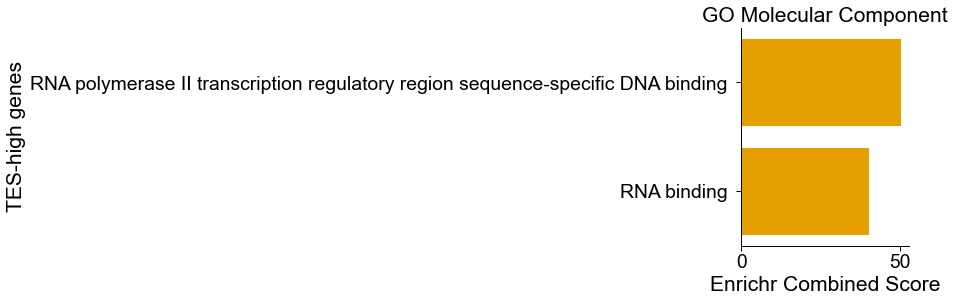

In [78]:
# tes - show molecular function
df = pd.read_csv('obs_major_tes_genes_GO/GO_Molecular_Function_2021.Human.enrichr.reports.txt', sep='\t')
n = 2
kind = 'tes'
df = df.head(n)
df = rm_go_number(df)
color = get_sector_colors()[0][kind]


sns.set_context('paper', font_scale=2.2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(3,4))
ax = sns.barplot(data=df, x='Combined Score', y='term', color=color, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(title='GO Molecular Component')

xlabel = 'Enrichr Combined Score'
ylabel = 'TES-high genes'

_ = ax.set(xlabel=xlabel, ylabel=ylabel)
fname = 'obs_major_tes_genes_GO/molecular_component_bar.pdf'
plt.savefig(fname, dpi=500, bbox_inches='tight')

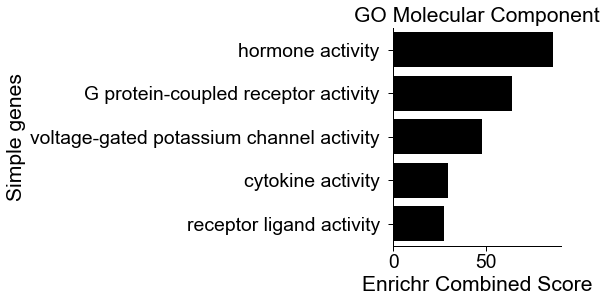

In [74]:
# simple - show molecular function
df = pd.read_csv('obs_major_simple_genes_GO/GO_Molecular_Function_2021.Human.enrichr.reports.txt', sep='\t')
n = 5
kind = 'simple'
df = df.head(n)
df = rm_go_number(df)
df = df.sort_values(by='Combined Score', ascending=False)
color = get_sector_colors()[0][kind]


sns.set_context('paper', font_scale=2.2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(3,4))
ax = sns.barplot(data=df, x='Combined Score', y='term', color=color, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(title='GO Molecular Component')

xlabel = 'Enrichr Combined Score'
ylabel = 'Simple genes'

_ = ax.set(xlabel=xlabel, ylabel=ylabel)
fname = 'obs_major_simple_genes_GO/molecular_component_bar.pdf'
plt.savefig(fname, dpi=500, bbox_inches='tight')

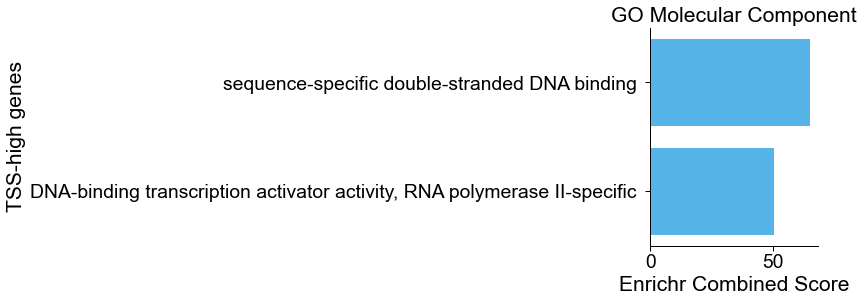

In [76]:
# simple - show molecular function
df = pd.read_csv('obs_major_tss_genes_GO/GO_Molecular_Function_2021.Human.enrichr.reports.txt', sep='\t')
n = 6
kind = 'tss'
df = df.iloc[[0,3]]
df = rm_go_number(df)
df = df.sort_values(by='Combined Score', ascending=False)
color = get_sector_colors()[0][kind]


sns.set_context('paper', font_scale=2.2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(3,4))
ax = sns.barplot(data=df, x='Combined Score', y='term', color=color, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(title='GO Molecular Component')

xlabel = 'Enrichr Combined Score'
ylabel = 'TSS-high genes'

_ = ax.set(xlabel=xlabel, ylabel=ylabel)
fname = 'obs_major_tss_genes_GO/molecular_component_bar.pdf'
plt.savefig(fname, dpi=500, bbox_inches='tight')